In [14]:
import geopandas as gp
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl
import matplotlib.animation as animation
from shapely.geometry import Point

In [54]:
sites = pd.read_csv('elevationpoints.csv')
dates = pd.read_csv('EUROEVOL09-07-201516-34_C14Samples.csv')
data = sites.set_index('SiteID').join(dates.set_index('SiteID'))
df

,Country,SiteName,Slope,SRTM_World,Aspect,C14ID,Period,C14Age,C14SD,LabCode,PhaseCode,Material,MaterialSpecies,geometry
SiteID,,,,,,,,,,,,,,
S1010,Great Britain,Abermawr I,636749.56250,7.0,189.40921,9378.0,UM,7640.0,150.0,OxA-1411,NaN,peat,NaN,POINT (-5.0823 51.9691)
S1010,Great Britain,Abermawr I,636749.56250,7.0,189.40921,9379.0,LMEN,5520.0,150.0,OxA-1377,NaN,peat,NaN,POINT (-5.0823 51.9691)
S1011,Great Britain,Abingdon,180000.00000,59.0,270.00000,8612.0,EN,4730.0,135.0,BM-348,AB,charcoal,NaN,POINT (-1.2613 51.68)
S1011,Great Britain,Abingdon,180000.00000,59.0,270.00000,25001.0,UM,6020.0,110.0,BM-349,NaN,charcoal,NaN,POINT (-1.2613 51.68)
S1011,Great Britain,Abingdon,180000.00000,59.0,270.00000,25002.0,EN,4910.0,110.0,BM-350,AB,charcoal,NaN,POINT (-1.2613 51.68)
S1011,Great Britain,Abingdon,180000.00000,59.0,270.00000,25003.0,EN,5060.0,130.0,BM-351,AB,charcoal,NaN,POINT (-1.2613 51.68)
S1011,Great Britain,Abingdon,180000.00000,59.0,270.00000,25004.0,EN,4710.0,135.0,BM-352,AB,animal bone,Bos sp.,POINT (-1.2613 51.68)
S1011,Great Britain,Abingdon,180000.00000,59.0,270.00000,25005.0,EN,4970.0,130.0,BM-353,AB,charcoal,NaN,POINT (-1.2613 51.68)
S1011,Great Britain,Abingdon,180000.00000,59.0,270.00000,25006.0,UN,4450.0,145.0,BM-354,NaN,animal bone,Bos sp.,POINT (-1.2613 51.68)


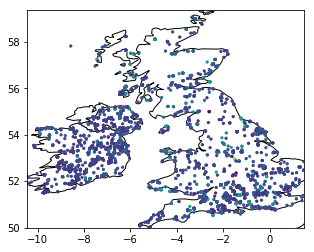

In [52]:
geometry = [Point(xy) for xy in zip(data.Longitude, data.Latitude)]
data = data.drop(['Longitude', 'Latitude'], axis=1)
crs = {'init': 'epsg:4326'}
gdf = gp.GeoDataFrame(data, crs=crs, geometry=geometry)
world = gp.read_file('ne_50m_admin_0_countries.shp')


fig, ax = ptl.subplots()

ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='black')
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
gdf.plot(ax=ax, marker='o',column='C14Age', markersize=5)

{'boxes': [<matplotlib.lines.Line2D at 0x7fba06c916d8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fba06c76e48>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fba06c8f390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fba06c76400>,
  <matplotlib.lines.Line2D at 0x7fba06c766a0>]}

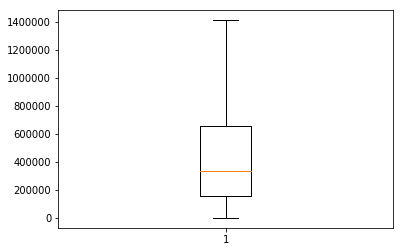

In [63]:

slope = data.Slope[np.logical_not(np.isnan(data.Slope))]
ptl.boxplot(slope, showfliers=False)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb9fe3a5390>],
 'caps': [<matplotlib.lines.Line2D at 0x7fba069ed0b8>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fba069ce208>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb9fe3a5588>,
  <matplotlib.lines.Line2D at 0x7fba069ec400>]}

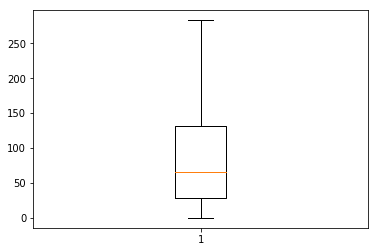

In [65]:
ele = data.SRTM_World[np.logical_not(np.isnan(data.SRTM_World))]
ptl.boxplot(ele, showfliers=False)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb9fe125f98>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb9fe1264a8>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb9fc418518>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb9fe125780>,
  <matplotlib.lines.Line2D at 0x7fb9fe126128>]}

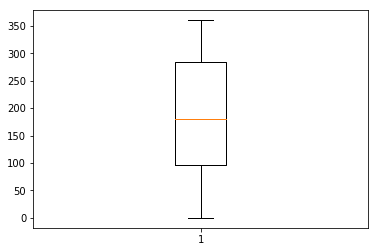

In [66]:
aspect = data.Aspect[np.logical_not(np.isnan(data.Aspect))]
ptl.boxplot(aspect, showfliers=False)

{'boxes': [<matplotlib.lines.Line2D at 0x7fb9fc523a90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb9fc51b860>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb9fc48e400>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb9fc523e10>,
  <matplotlib.lines.Line2D at 0x7fb9fc523470>]}

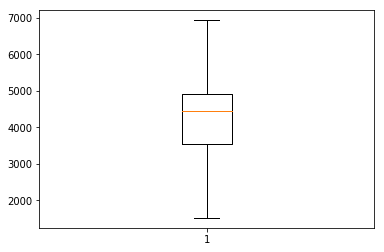

In [67]:
age = data.C14Age[np.logical_not(np.isnan(data.C14Age))]
ptl.boxplot(age, showfliers=False)